In [2]:
setwd('/import/DB/zhang//data')

library(Seurat)

Warning message:
"package 'Seurat' was built under R version 4.2.3"
The legacy packages maptools, rgdal, and rgeos, underpinning the sp package,
which was just loaded, will retire in October 2023.
Please refer to R-spatial evolution reports for details, especially
https://r-spatial.org/r/2023/05/15/evolution4.html.
It may be desirable to make the sf package available;
package maintainers should consider adding sf to Suggests:.
The sp package is now running under evolution status 2
     (status 2 uses the sf package in place of rgdal)

Attaching SeuratObject



In [3]:
daa = readRDS('./OS.add.copykat.rds')

In [4]:
table(daa$orig.ident,daa$copykat.tumor.pred)

              
               aneuploid diploid
  C1                   0     237
  C2                   0     195
  C3                   0      58
  C4                   0     191
  S1                   0     235
  S2                   2     497
  S3                   1     223
  S4                   1     389
  WH2109002886      2054    1460
  WH2109013167      1935     654
  WH2112008442        35    6356
  WH2201006389         9    3983
  WH2203005877         0    1001

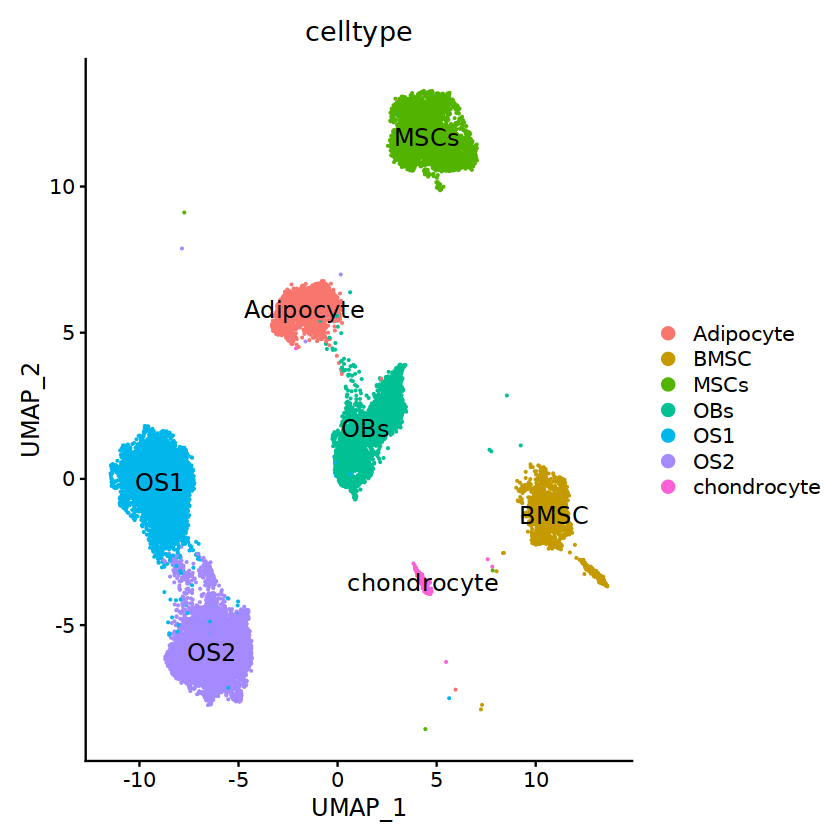

An object of class Seurat 
20168 features across 2908 samples within 1 assay 
Active assay: RNA (20168 features, 0 variable features)

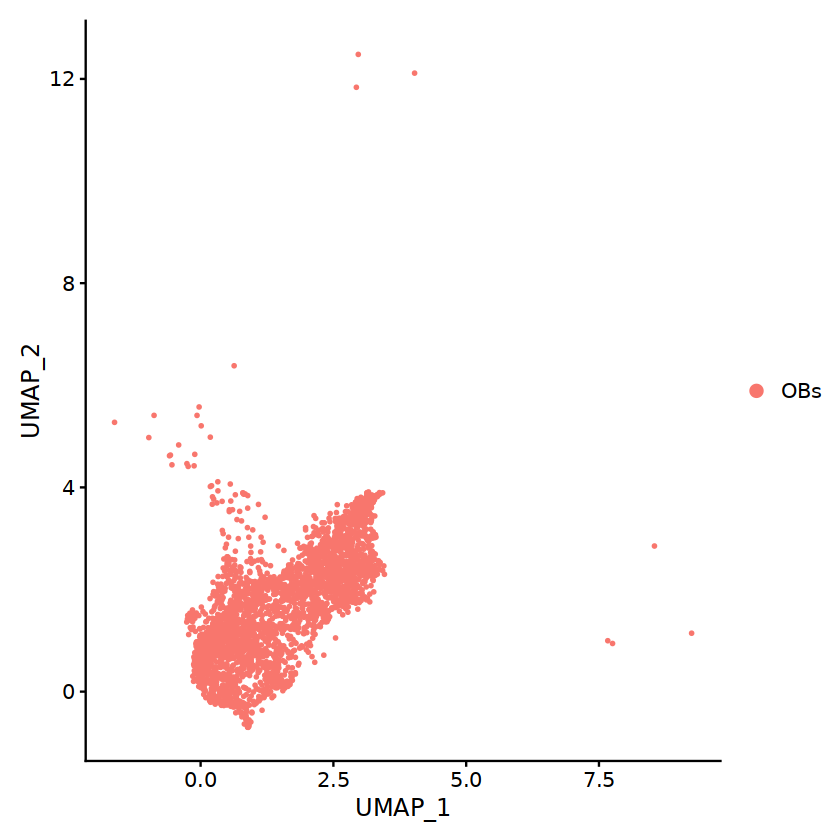

In [5]:
DefaultAssay(daa) = 'RNA'
library(Seurat)
Idents(daa) = 'celltype'
DimPlot(daa, group.by="celltype", label=T, label.size=5, reduction='umap')
OS = subset(daa,celltype =='OBs')
DimPlot(OS)
mca2=CreateSeuratObject(OS@assays$RNA@data,assay = "RNA",min.cells =5 ,meta.data = OS@meta.data)
immune.combined = mca2
immune.combined

In [6]:
table(immune.combined$group)


     OS control 
   2502     406 

In [7]:
Idents(immune.combined) = 'group'

In [8]:
library(Seurat)

In [9]:
DefaultAssay(immune.combined) = 'RNA'

In [10]:
gene = FindMarkers(immune.combined,ident.1 = 'OS')

In [11]:
library(dplyr)


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




In [12]:
up = gene %>%  filter( avg_log2FC > 0) %>%  rownames()

In [13]:
down = gene %>%  filter( avg_log2FC < 0) %>%  rownames()

In [14]:
all =c(up,down)

In [15]:
go_kegg_func = function(x){
    library(ggrepel)
    library(ggplot2)
    library(cowplot)
    library(pheatmap)
    library(enrichplot)
    library(clusterProfiler)
    
    library(org.Hs.eg.db)
    gene_symbol <- bitr(geneID = x,  
                        fromType="SYMBOL",   
                        toType=c("ENTREZID"),  
                        OrgDb="org.Hs.eg.db")
    gene <- gene_symbol[,2]
    BP <- enrichGO(gene = gene,  
                   keyType = "ENTREZID",  
                   OrgDb=org.Hs.eg.db,  
                   ont = "BP",   
                   pvalueCutoff = 1,  
                   pAdjustMethod = "fdr", 
                   minGSSize = 5,   
                   maxGSSize = 500,  
                   qvalueCutoff = 1,  
                   readable = TRUE)  
    dotplot(BP,showCategory = 15)
    ggsave(paste0(substitute(x),'.GO_enrichment_dotplot.pdf'),height = 15,width = 8)
    # bp <-clusterProfiler::simplify(BP)
    # BP_ego <- enrichplot::pairwise_termsim(bp)
    # emapplot(BP_ego, cex_label_category=.8, cex_line=.5,showCategory = 15) + 
    #   ggplot2::scale_fill_continuous(low = "#e06663", high = "#327eba", name = "p.adjust",
    #                         guide = ggplot2::guide_colorbar(reverse = TRUE, order=2.5), trans='log10')
    # ggsave(paste0(substitute(x),'.GO_enrichment_emapplot.pdf'),height = 15,width = 8)
    df <- BP@result
    write.csv(df ,file = paste0(substitute(x),'.GO_results.csv'))
    ## KEGG
    ek <- enrichKEGG(gene =gene , 
                   organism = "hsa",  
                   pvalueCutoff =1, 
                   qvalueCutoff = 1) 
    keggres = ek@result
    write.csv(keggres,file = paste0(substitute(x),'.kegg_results.csv'))
    enrichplot::dotplot(ek,  
            x = "GeneRatio", 
            color = "p.adjust", 
            showCategory = 15, 
            size = 'Count', 
            title = "KEGG_enrichment_dotplot"  
            )
    ggsave(paste0(substitute(x),'.KEGG_enrichment_dotplot.pdf'),height = 6,width = 6)
    # KEGG2 <- pairwise_termsim(ek)
    # emapplot(KEGG2, cex_label_category=.8, cex_line=.5,showCategory = 15) + 
    #   ggplot2::scale_fill_continuous(low = "#e06663", high = "#327eba", name = "p.adjust",
    #                         guide = ggplot2::guide_colorbar(reverse = TRUE, order=2.5), trans='log10')
    # ggsave(paste0(substitute(x),'.KEGG_enrichment_net.pdf'),height = 8,width = 8)   


    
}

In [16]:
go_kegg_func(up)

Warning message:
"package 'ggrepel' was built under R version 4.2.3"
Loading required package: ggplot2

Warning message:
"package 'ggplot2' was built under R version 4.2.3"
Warning message:
"package 'cowplot' was built under R version 4.2.3"
Warning message:
"package 'pheatmap' was built under R version 4.2.3"
Warning message:
"package 'enrichplot' was built under R version 4.2.2"


Registered S3 methods overwritten by 'treeio':
  method              from    
  MRCA.phylo          tidytree
  MRCA.treedata       tidytree
  Nnode.treedata      tidytree
  Ntip.treedata       tidytree
  ancestor.phylo      tidytree
  ancestor.treedata   tidytree
  child.phylo         tidytree
  child.treedata      tidytree
  full_join.phylo     tidytree
  full_join.treedata  tidytree
  groupClade.phylo    tidytree
  groupClade.treedata tidytree
  groupOTU.phylo      tidytree
  groupOTU.treedata   tidytree
  is.rooted.treedata  tidytree
  nodeid.phylo        tidytree
  nodeid.treedata     tidytree
  nodelab

In [17]:
go_kegg_func(down)

'select()' returned 1:1 mapping between keys and columns

Warning message in bitr(geneID = x, fromType = "SYMBOL", toType = c("ENTREZID"), :
"23.18% of input gene IDs are fail to map..."


In [18]:
go_kegg_func(all)

'select()' returned 1:1 mapping between keys and columns

Warning message in bitr(geneID = x, fromType = "SYMBOL", toType = c("ENTREZID"), :
"5.64% of input gene IDs are fail to map..."


### table(immune.combined$copykat.tumor.pred)

In [19]:
table(immune.combined$copykat.tumor.pred)


aneuploid   diploid 
     1392      1516 

In [20]:
table(immune.combined$group)


     OS control 
   2502     406 

In [33]:
immune.combined@meta.data = immune.combined@meta.data %>%
  mutate(cellgroup = case_when(group == 'control'  ~ 'normal_OB',
                             group == 'OS' & copykat.tumor.pred == 'diploid' ~ 'Inter_OB',
                             TRUE ~ 'tumor_OB' ))

In [34]:
table(immune.combined$cellgroup)


 Inter_OB normal_OB  tumor_OB 
     1111       406      1391 

In [35]:
library(harmony)
DefaultAssay(immune.combined) = 'RNA'
table(OS$orig.ident)
sceList <- SplitObject(immune.combined, split.by = "orig.ident")
single.ob=merge(sceList[[1]],sceList[2:length(sceList)])
DefaultAssay(single.ob) = 'RNA'
scRNA_harmony = single.ob
scRNA_harmony <- NormalizeData(scRNA_harmony) %>% FindVariableFeatures() %>% ScaleData() %>% RunPCA(verbose=FALSE)
##整合
system.time({scRNA_harmony <- RunHarmony(scRNA_harmony, group.by.vars = "orig.ident")})
scRNA_harmony <- RunUMAP(scRNA_harmony, reduction = "harmony", dims = 1:30)
scRNA_harmony <- RunTSNE(scRNA_harmony, reduction = "harmony", dims = 1:30)
scRNA_harmony <- FindNeighbors(scRNA_harmony, reduction = "harmony", dims = 1:30) %>% FindClusters(resolution =  0.1)
##作图
#group_by_cluster


          C1           C2           C3           C4           S1           S2 
          83           51           12           48           18          102 
          S3           S4 WH2109002886 WH2109013167 WH2112008442 WH2201006389 
          63           29          781          641          409          598 
WH2203005877 
          73 

Centering and scaling data matrix

Transposing data matrix

Initializing state using k-means centroids initialization

Harmony 1/10

Harmony 2/10

Harmony converged after 2 iterations

Warning message:
"Invalid name supplied, making object name syntactically valid. New object name is Seurat..ProjectDim.RNA.harmony; see ?make.names for more details on syntax validity"


   user  system elapsed 
  1.783   4.544   0.892 

08:02:01 UMAP embedding parameters a = 0.9922 b = 1.112

08:02:01 Read 2908 rows and found 30 numeric columns

08:02:01 Using Annoy for neighbor search, n_neighbors = 30

08:02:01 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

08:02:02 Writing NN index file to temp file /tmp/RtmpJ6Xv8U/fileb8b831d1376

08:02:02 Searching Annoy index using 1 thread, search_k = 3000

08:02:02 Annoy recall = 100%

08:02:03 Commencing smooth kNN distance calibration using 1 thread
 with target n_neighbors = 30

08:02:04 Initializing from normalized Laplacian + noise (using irlba)

08:02:04 Commencing optimization for 500 epochs, with 116820 positive edges

08:02:12 Optimization finished

Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 2908
Number of edges: 110632

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9646
Number of communities: 6
Elapsed time: 0 seconds


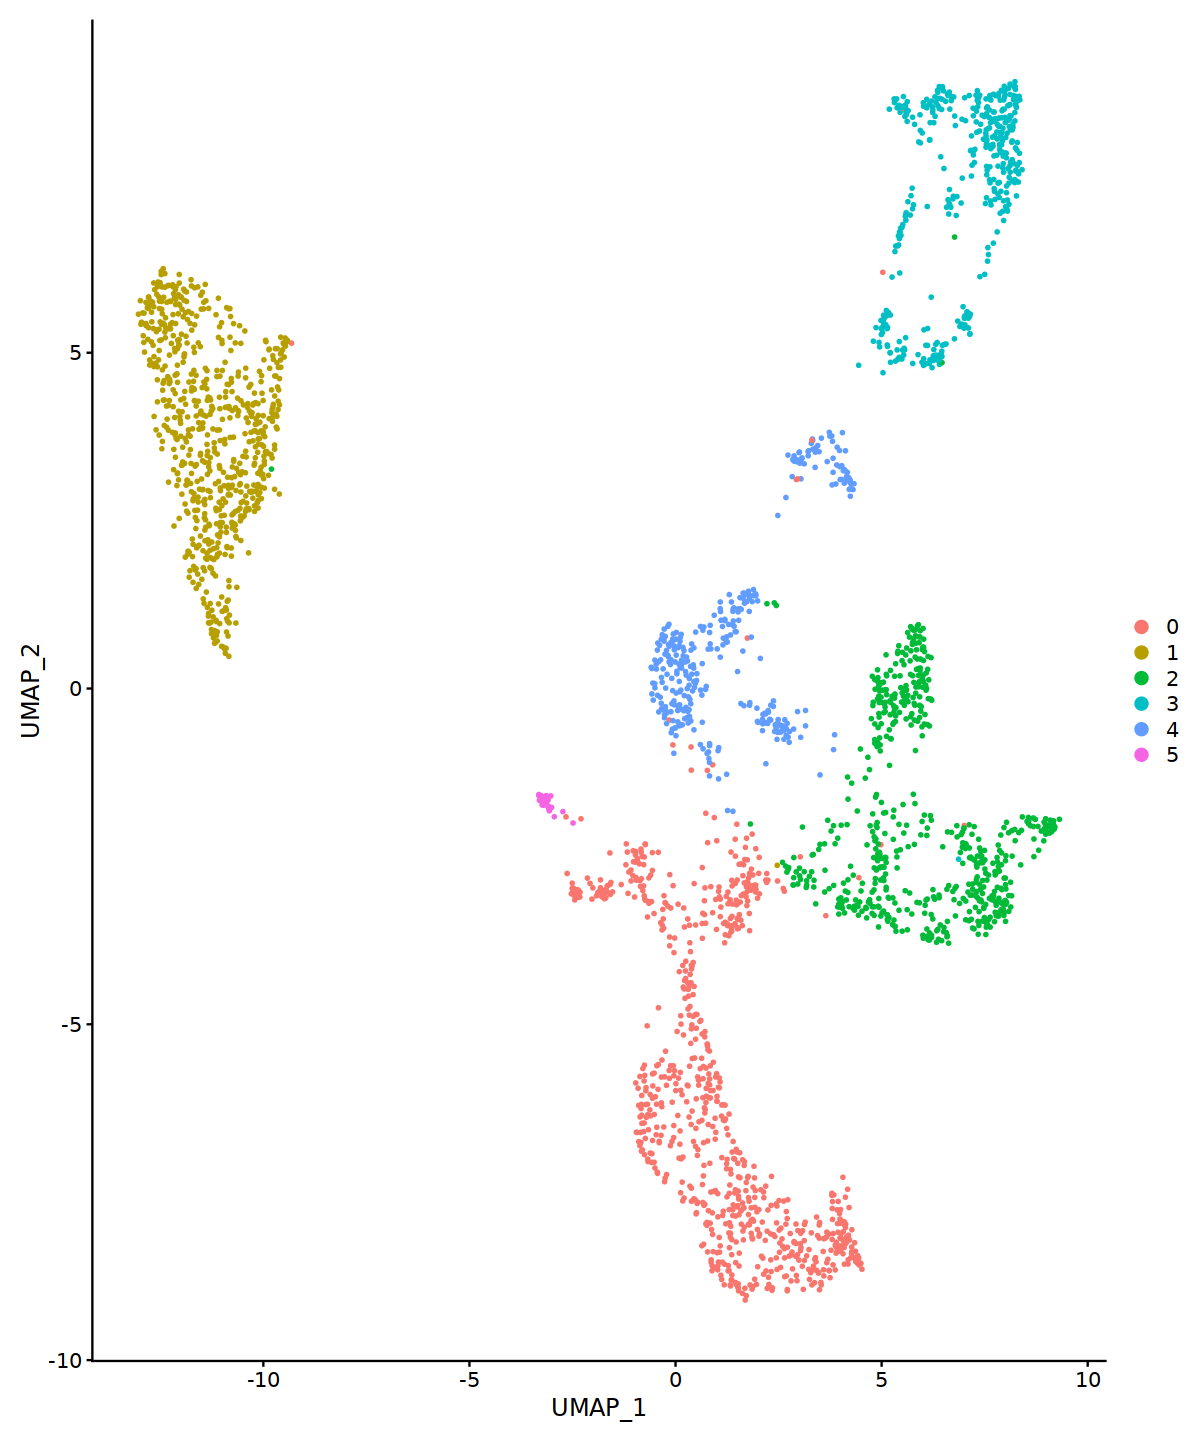

In [36]:
Idents(scRNA_harmony) = 'seurat_clusters'
DimPlot(scRNA_harmony)

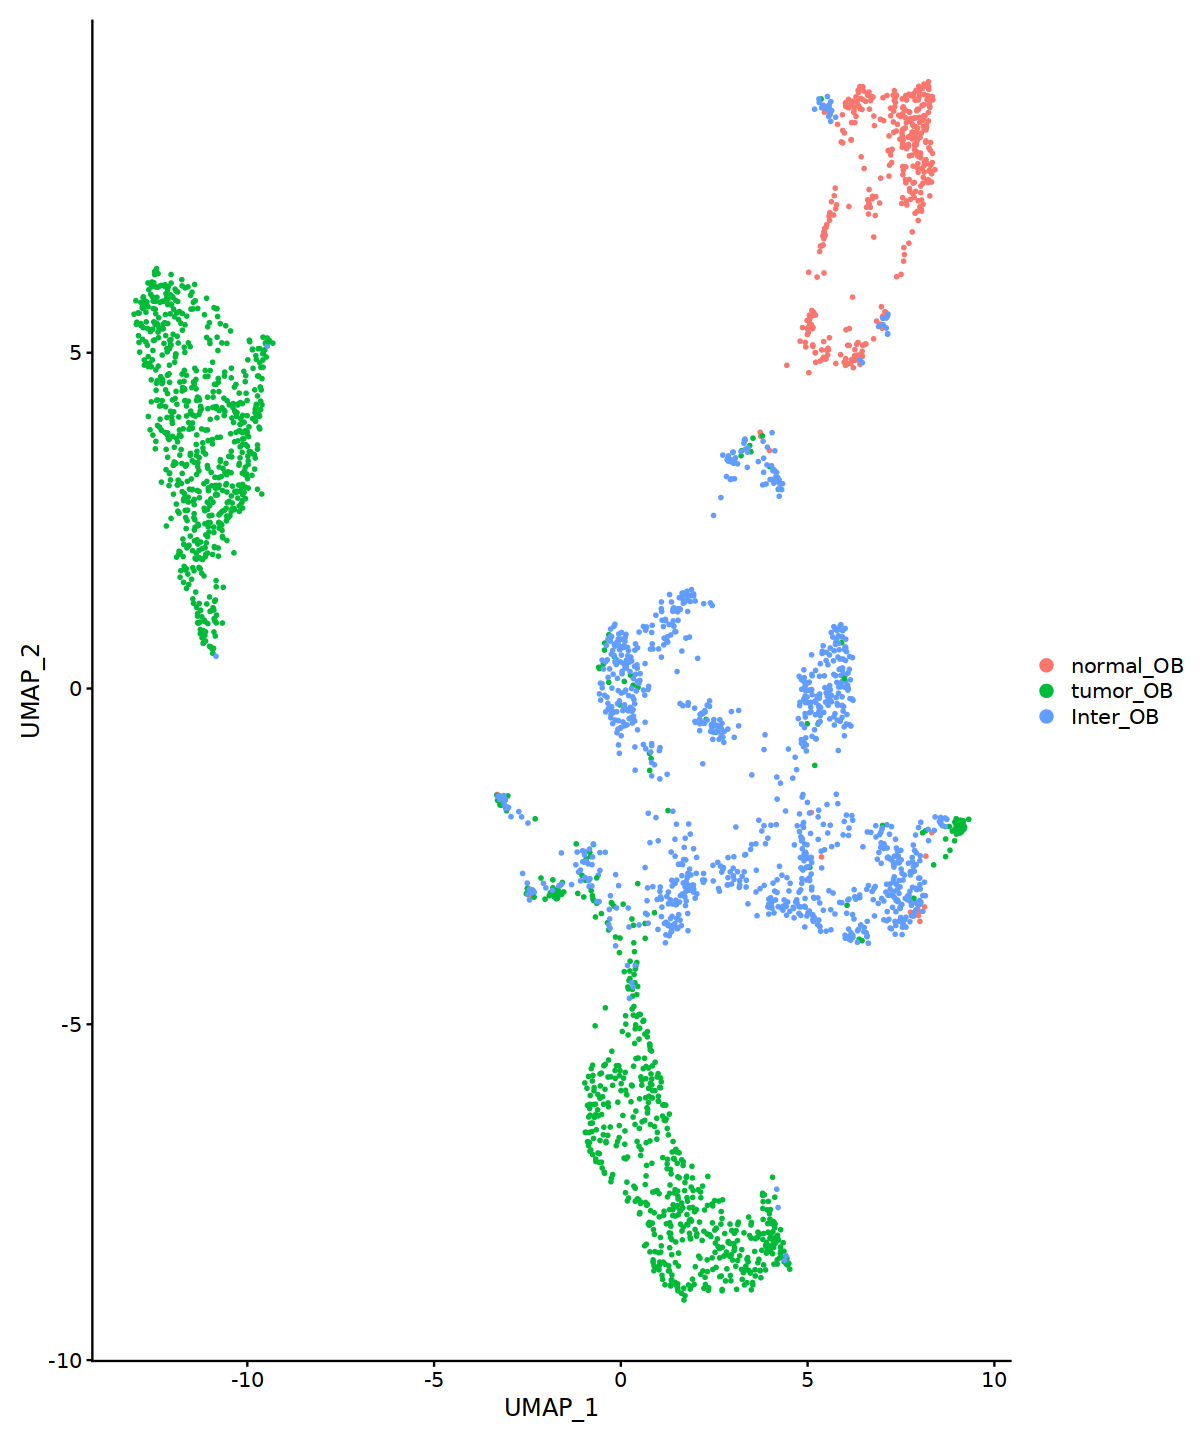

In [37]:
Idents(scRNA_harmony) = 'cellgroup'
DimPlot(scRNA_harmony)

In [38]:
celltype = data.frame(ClusterID=c(0,1,2,3,4), celltype=c(
    'tumor_OB1','tumor_OB2','Inter_OB','normal_OB','Inter_OB'
), stringsAsFactors = FALSE)

In [39]:
scRNA_harmony@meta.data$celltype = "NA"
# 赋值
for(i in 1:nrow(celltype)){
  scRNA_harmony@meta.data[which(scRNA_harmony@meta.data$seurat_clusters == celltype$ClusterID[i]),'celltype'] <- celltype$celltype[i]}

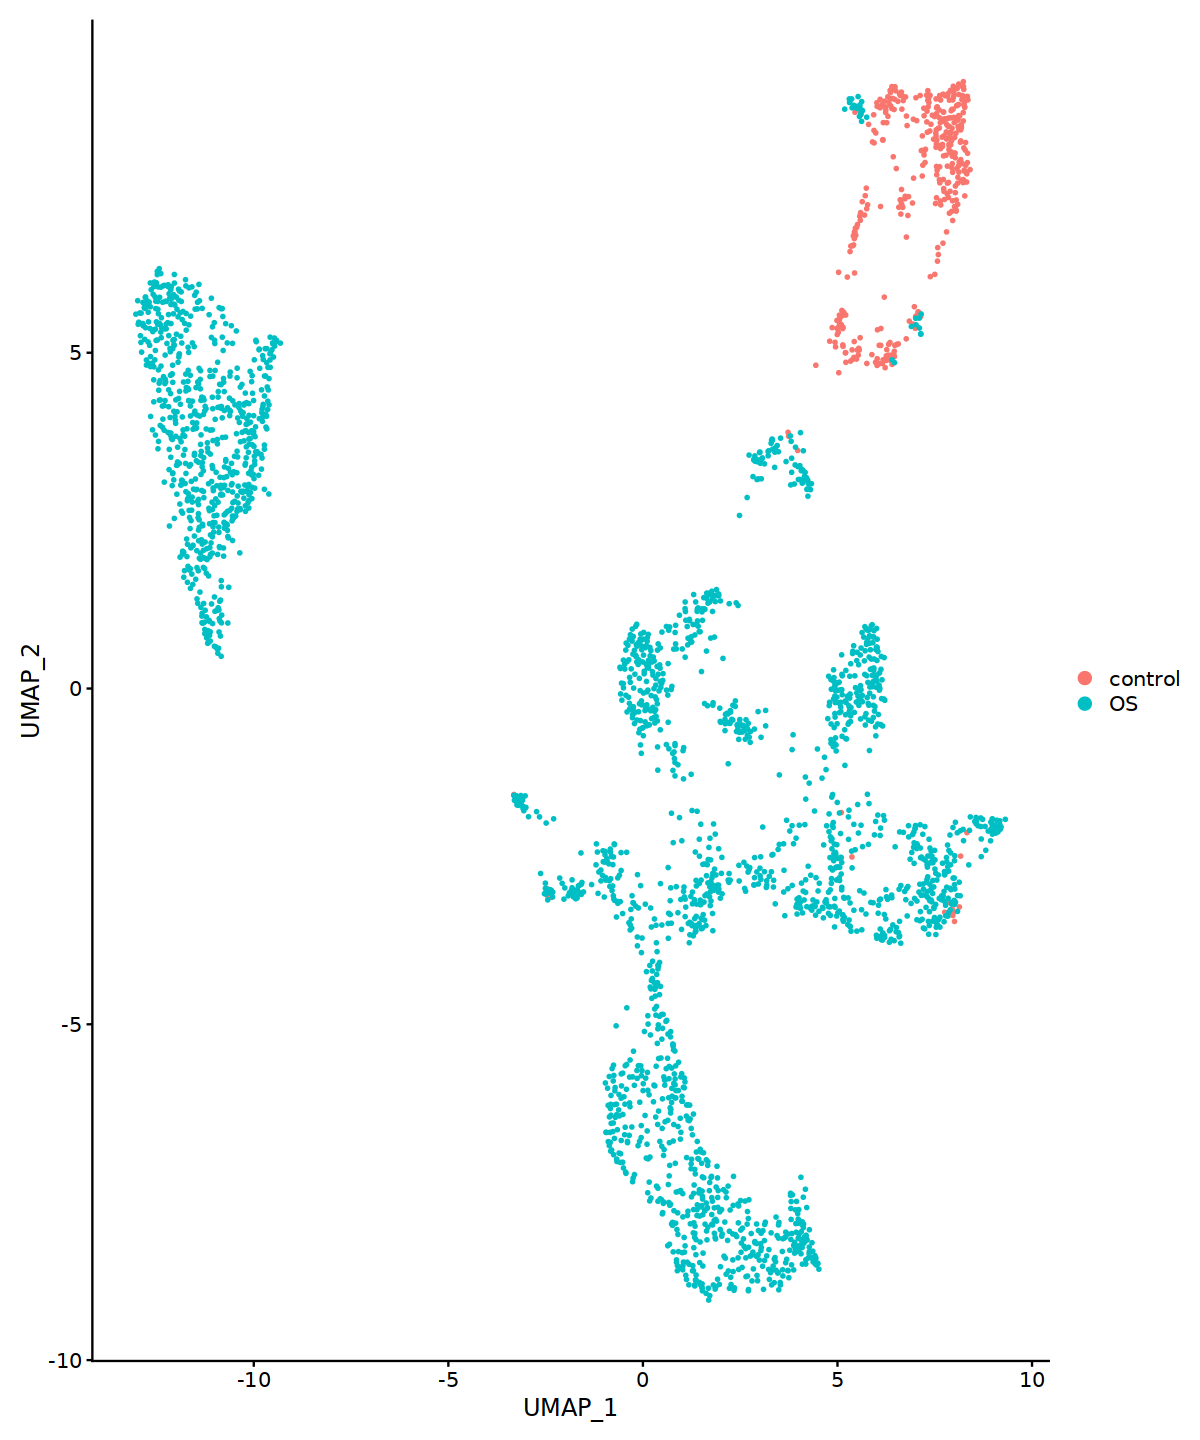

In [40]:
Idents(scRNA_harmony) = 'group'
DimPlot(scRNA_harmony)

In [41]:
saveRDS(scRNA_harmony,file = 'OBcell.final.rds')

In [42]:
options(repr.plot.width = 10,repr.plot.height = 12)

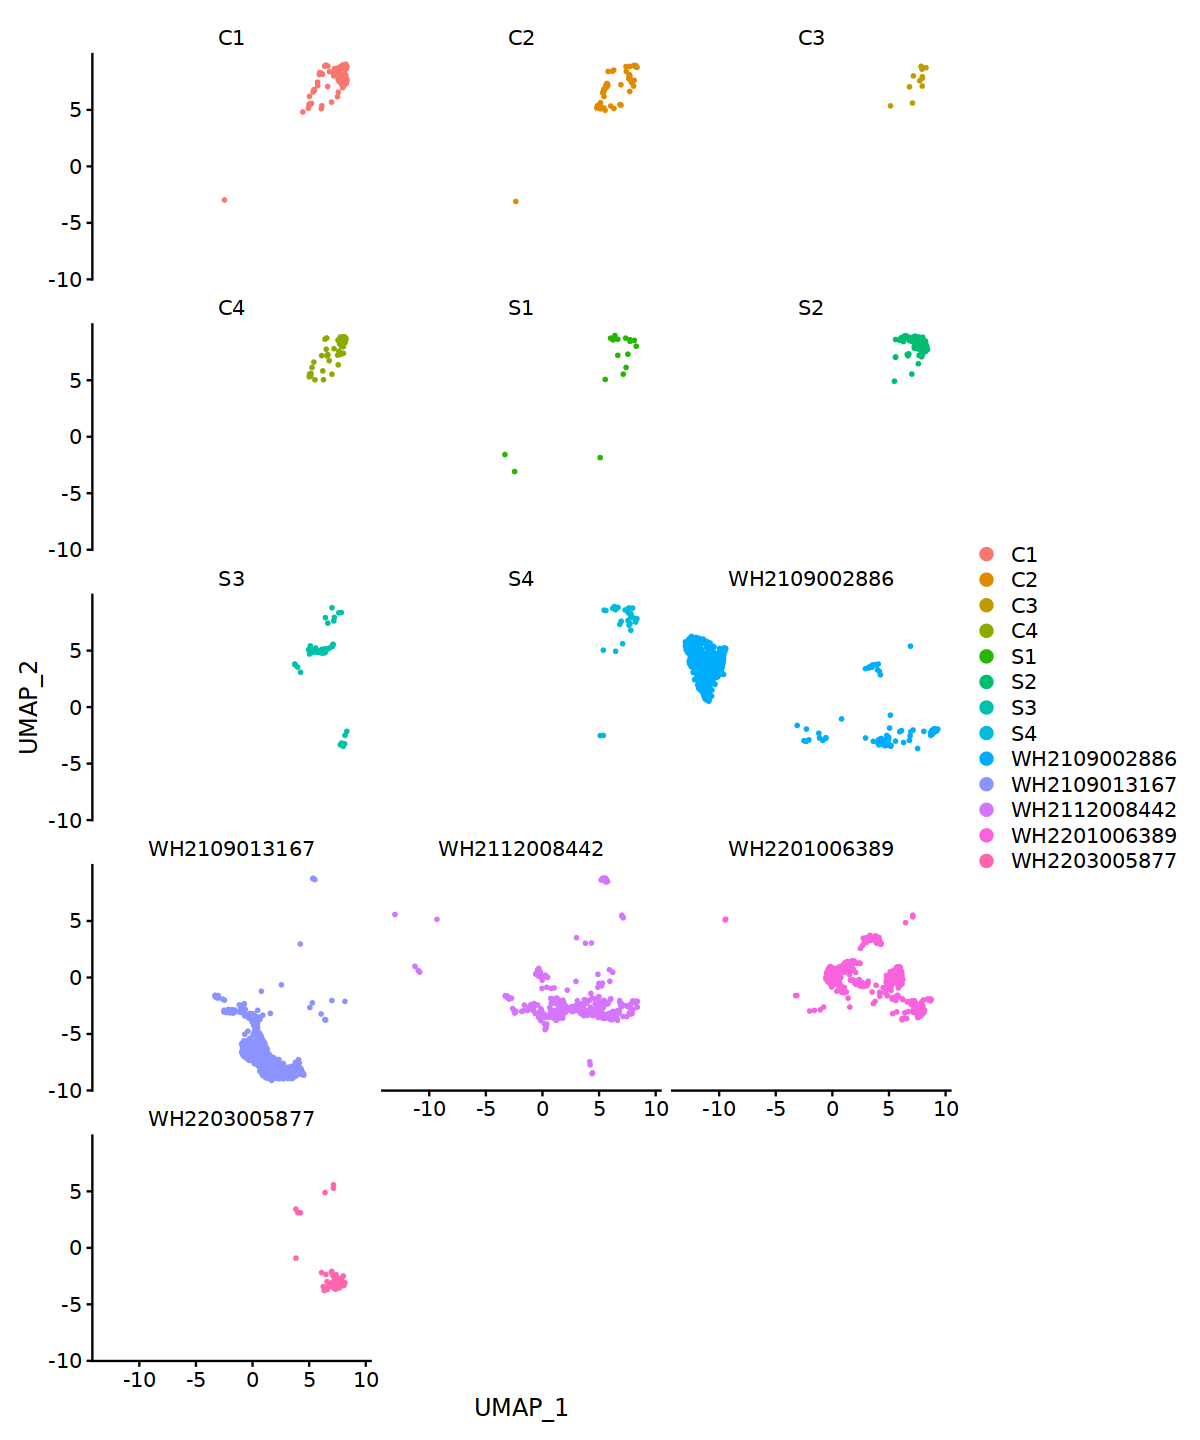

In [43]:
Idents(scRNA_harmony) = 'sample'
DimPlot(scRNA_harmony,split.by = 'sample',ncol = 3)

In [44]:
scRNA = scRNA_harmony

In [45]:
Idents(scRNA) = 'cellgroup'
DefaultAssay(scRNA) = 'RNA'
sce.markers <- FindAllMarkers(object = scRNA, only.pos = TRUE, 
                              min.pct = 0.25, 
                              thresh.use = 0.25)
 

# library(dplyr) 
# # 不同seurat版本的 avg_logFC 不一样 
# top5 <- sce.markers %>% group_by(cluster) %>% top_n(5, avg_log2FC)


Calculating cluster normal_OB

Calculating cluster tumor_OB

Calculating cluster Inter_OB



In [46]:
library(dplyr) 
# 不同seurat版本的 avg_logFC 不一样 
top5 <- sce.markers %>% group_by(cluster) %>% top_n(15, avg_log2FC)

In [47]:
gene_cell_exp <- AverageExpression(scRNA,
                                   features = unique(top5$gene),
                                   group.by = 'cellgroup',
                                   slot = 'data') 
gene_cell_exp <- as.data.frame(gene_cell_exp$RNA)

In [53]:
gene_cell_exp = gene_cell_exp[,c('normal_OB',"tumor_OB",'Inter_OB')]

In [54]:
library(ComplexHeatmap)
#顶部细胞类型注释
df <- data.frame(colnames(gene_cell_exp))
colnames(df) <- 'class'

In [55]:
df$class = factor(df$class,levels = c('normal_OB',"tumor_OB",'Inter_OB'))

In [56]:
top_anno = HeatmapAnnotation(df = df,#细胞名/cluster
                             border = T,
                             show_annotation_name = F,
                             gp = gpar(col = 'black'),
                             col = list(class = c('normal_OB' = '#A0CCFF','Inter_OB'="#2F528F",
                                                  "tumor_OB"="#E3AD68")))#颜色设置

In [57]:
#数据标准化缩放一下
marker_exp <- t(scale(t(gene_cell_exp),scale = T,center = T))

In [61]:
options(repr.plot.height = 8,repr.plot.width = 6)

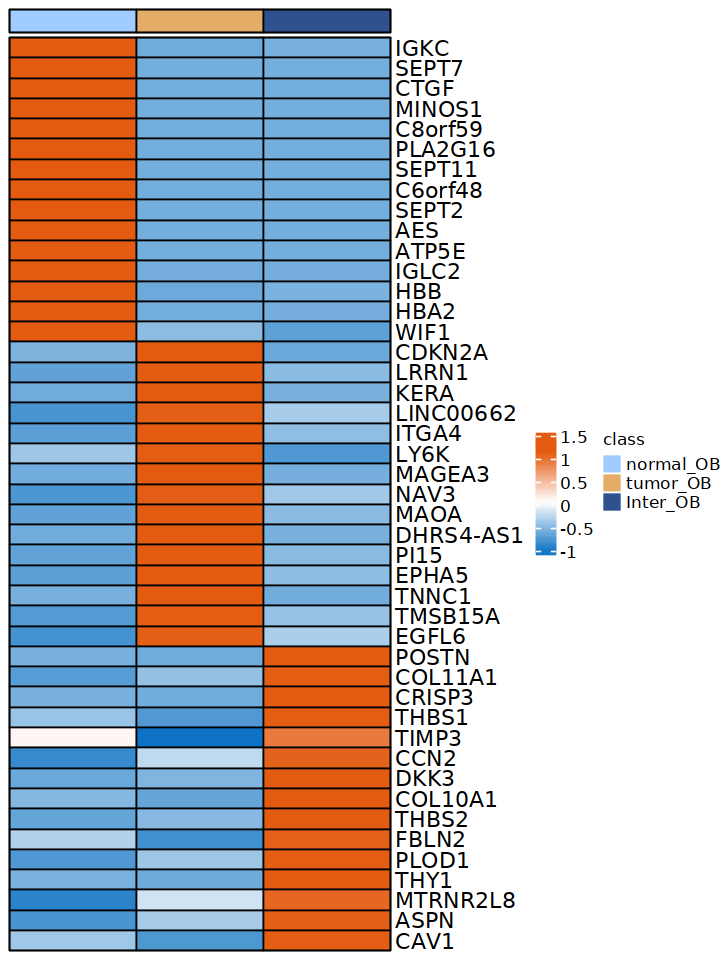

In [62]:
Heatmap(marker_exp,
        cluster_rows = F,
        cluster_columns = F,
        show_column_names = F,
        show_row_names = T,
        column_title = NULL,
        heatmap_legend_param = list(
          title=' '),
        col = colorRampPalette(c("#0D72C3","white","#E35B10"))(100),
        border = 'black',
        rect_gp = gpar(col = "black", lwd = 1),
        row_names_gp = gpar(fontsize = 13),
        column_names_gp = gpar(fontsize = 13),
        top_annotation = top_anno)

In [63]:
scRNA$celltype = scRNA$cellgroup

In [64]:
library(GSVA)
library(tidyverse)
library(org.Hs.eg.db)
Idents(scRNA) <- "celltype" 
expr <- AverageExpression(scRNA, assays = "RNA", slot = "data")[[1]]
expr <- expr[rowSums(expr)>0,]  #过滤细胞表达量全为零的基因
expr <- as.matrix(expr)
# library(msigdbr)
# msigdbr_species() #列出有的物种

Warning message:
"package 'GSVA' was built under R version 4.2.3"
Warning message:
"package 'tibble' was built under R version 4.2.3"
Warning message:
"package 'tidyr' was built under R version 4.2.3"
Warning message:
"package 'readr' was built under R version 4.2.3"
Warning message:
"package 'purrr' was built under R version 4.2.3"
Warning message:
"package 'stringr' was built under R version 4.2.3"
Warning message:
"package 'forcats' was built under R version 4.2.3"
Warning message:
"package 'lubridate' was built under R version 4.2.3"
Warning message in system("timedatectl", intern = TRUE):
"running command 'timedatectl' had status 1"
-- Attaching core tidyverse packages ------------------------ tidyverse 2.0.0 --
v forcats   1.0.0     v stringr   1.5.0
v lubridate 1.9.2     v tibble    3.2.1
v purrr     1.0.2     v tidyr     1.3.1
v readr     2.1.4     
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x lubridate::%within%()     masks IRanges::%withi

In [65]:
d = '/import/DB' 

In [66]:
gmtfs <- list.files(d,pattern = '.gmt')  # 路径下所有结尾为symbols.gmt文件
gmtfs

[1] "BP.gmt"                   "h.all.v7.5.1.symbols.gmt"
[3] "kegg.gmt"

In [67]:
library(GSEABase)

Warning message:
"package 'GSEABase' was built under R version 4.2.2"
Loading required package: annotate

Warning message:
"package 'annotate' was built under R version 4.2.2"
Loading required package: XML

Loading required package: graph

Warning message:
"package 'graph' was built under R version 4.2.3"

Attaching package: 'graph'


The following object is masked from 'package:XML':

    addNode


The following object is masked from 'package:stringr':

    boundary




In [68]:
kegg_list <- getGmt(file.path(d,gmtfs[3])) 
go_list <- getGmt(file.path(d,gmtfs[1])) 
hall_list <- getGmt(file.path(d,gmtfs[2])) 

Warning message in getGmt(file.path(d, gmtfs[1])):
"2 record(s) contain duplicate ids: GOBP_CIRCULATORY_SYSTEM_DEVELOPMENT, GOBP_PROTEOLYSIS_INVOLVED_IN_PROTEIN_CATABOLIC_PROCESS"


In [75]:
human_KEGG_Set = hall_list
# #选择基因集合
# human_KEGG = msigdbr(species = "Homo sapiens", #物种
#                       category = "C2",
#                      subcategory = "KEGG") %>% 
#   dplyr::select(gs_name,gene_symbol)#这里可以选择gene symbol或者ID
# human_KEGG_Set = human_KEGG %>% split(x = .$gene_symbol, f = .$gs_name)

library(GSVA)
gsva.kegg <- gsva(expr, gset.idx.list = human_KEGG_Set, 
             kcdf="Gaussian",
             method = "gsva",
             parallel.sz=1)
head(gsva.kegg)

dim(gsva.kegg)

a = c()
ds = as.data.frame(gsva.kegg) 
for (i in 1:dim(ds)[2] ){
    path = ds[ order (-ds[,i]),] %>%  head(8) %>%  rownames()
    a = unique(c(a,path))
 }
gsva.kegg = gsva.kegg[a,]
options(repr.plot.width = 9,repr.plot.height =  8)
rownames(gsva.kegg) = gsub('HALLMARK_','',rownames(gsva.kegg))

rownames(gsva.kegg)= tolower(rownames(gsva.kegg))

Warning message:
"useNames = NA is deprecated. Instead, specify either useNames = TRUE or useNames = TRUE."


Estimating GSVA scores for 50 gene sets.
Estimating ECDFs with Gaussian kernels
  |======================================================================| 100%



,normal_OB,tumor_OB,Inter_OB
HALLMARK_ADIPOGENESIS,0.24481758,-0.3932012,0.07908742
HALLMARK_ALLOGRAFT_REJECTION,0.38499642,-0.4283056,0.14018240
HALLMARK_ANDROGEN_RESPONSE,-0.05616128,-0.3005119,0.21720006
HALLMARK_ANGIOGENESIS,-0.09453053,-0.4667708,0.51085203
HALLMARK_APICAL_JUNCTION,0.08294827,-0.3425906,0.30621876
HALLMARK_APICAL_SURFACE,0.12769122,-0.3741779,0.37567070


[1] 50  3

In [76]:
options(repr.plot.width = 5,repr.plot.height = 6)

In [96]:
library(pheatmap)
p = pheatmap(gsva.kegg, scale = "row",angle_col = "45",cluster_cols  = FALSE,cluster_rows = FALSE,
        #      show_column_names = FALSE,
        # show_row_names = TRUE,
             color = colorRampPalette(c("navy", "white", "firebrick3"))(50))

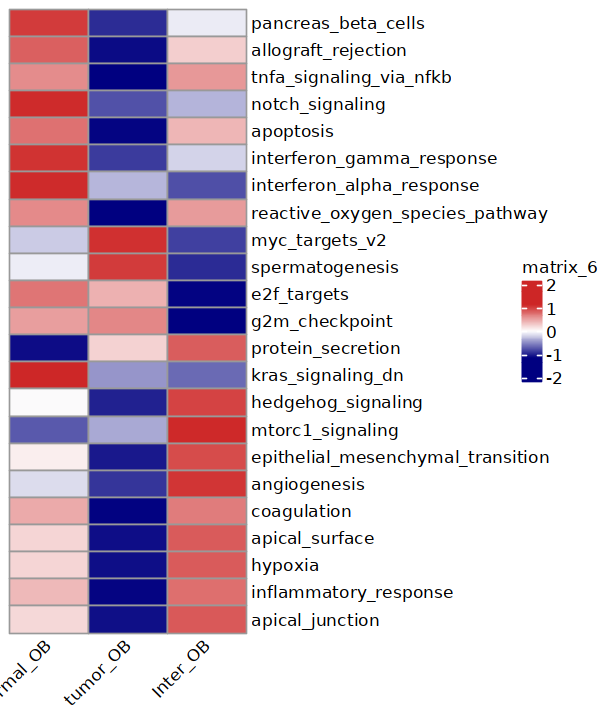

In [97]:
p